In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_excel('data/CTG.xls', sheet_name='Raw Data', header=0, skiprows=[1])
# df.drop(columns=['FileName','Date','SegFile', 'b','e','LBE'], inplace=True)
df

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
0,120,120,0,0,0,73,0.5,43,2.4,0,...,62,126,2,0,120,137,121,73,1,2
1,132,132,4,0,4,17,2.1,0,10.4,2,...,68,198,6,1,141,136,140,12,0,1
2,133,133,2,0,5,16,2.1,0,13.4,2,...,68,198,5,1,141,135,138,13,0,1
3,134,134,2,0,6,16,2.4,0,23.0,2,...,53,170,11,0,137,134,137,13,1,1
4,132,132,4,0,5,16,2.4,0,19.9,0,...,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,140,0,0,6,79,0.2,25,7.2,0,...,137,177,4,0,153,150,152,2,0,2
2122,140,140,1,0,9,78,0.4,22,7.1,0,...,103,169,6,0,152,148,151,3,1,2
2123,140,140,1,0,7,79,0.4,20,6.1,0,...,103,170,5,0,153,148,152,4,1,2
2124,140,140,1,0,9,78,0.4,27,7.0,0,...,103,169,6,0,152,147,151,4,1,2


In [4]:
# Matriz
data = df.to_numpy()

In [5]:
data

array([[120., 120.,   0., ...,  73.,   1.,   2.],
       [132., 132.,   4., ...,  12.,   0.,   1.],
       [133., 133.,   2., ...,  13.,   0.,   1.],
       ...,
       [140., 140.,   1., ...,   4.,   1.,   2.],
       [140., 140.,   1., ...,   4.,   1.,   2.],
       [142., 142.,   1., ...,   1.,   0.,   1.]])

In [6]:
np.shape(data)

(2126, 24)

**Variables description**

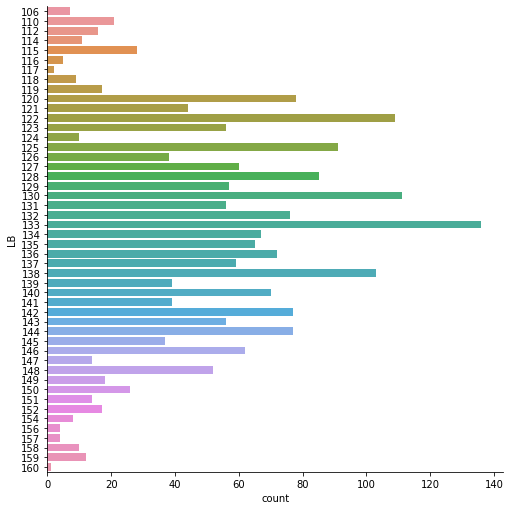

In [9]:
sns.catplot(y="LB",data=df, kind='count',height=7, aspect=1)

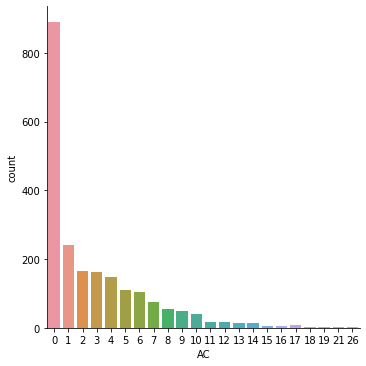

In [10]:
sns.catplot(x="AC",data=df, kind='count')

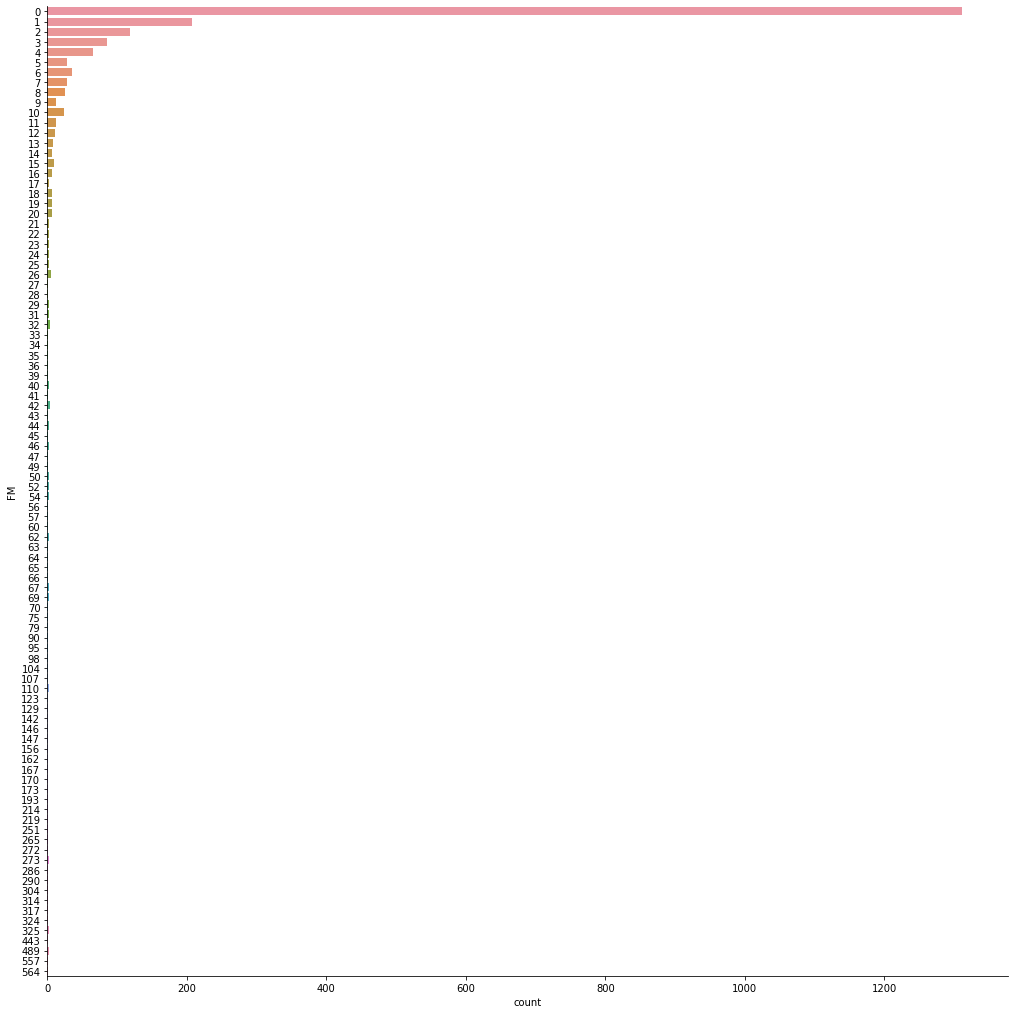

In [11]:
sns.catplot(y="FM",data=df, kind='count', height=14, aspect=1)

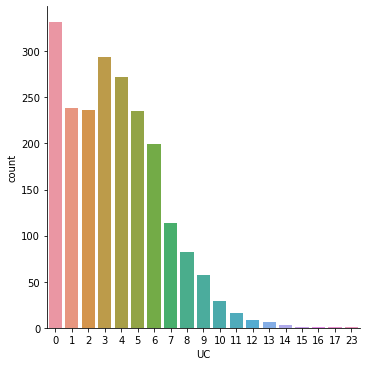

In [12]:
sns.catplot(x="UC",data=df, kind='count')

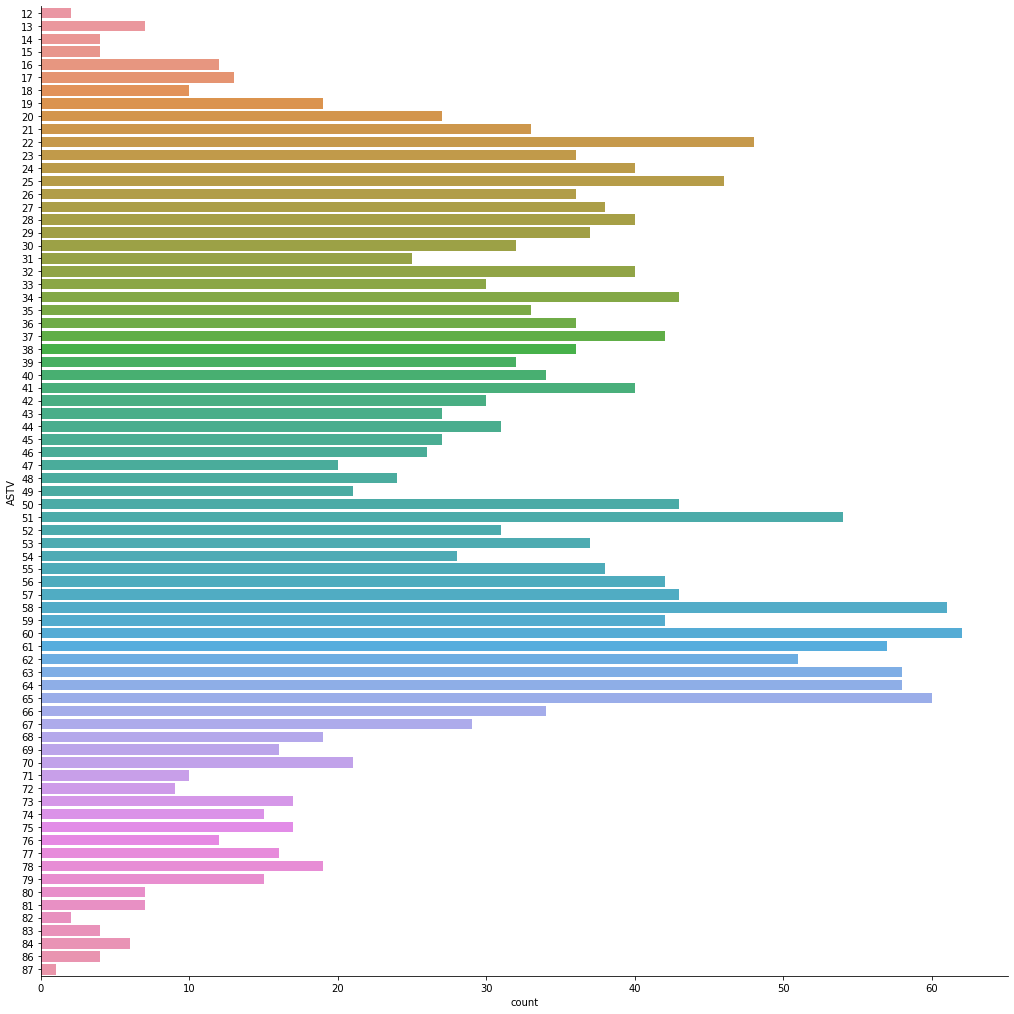

In [15]:
sns.catplot(y="ASTV",data=df, kind='count', height=14, aspect=1)